In [ ]:
import spacy
import spacy.cli
from scipy import spatial
spacy.cli.download("en_core_web_md")
nlp = spacy.load('en_core_web_md')

In [ ]:
import pandas as pd
import numpy as np
import pickle

IMDB database loading

In [ ]:
# Mounting the google drive to google colab in order to load the data files directly from it
from google.colab import drive
drive.mount('/content/drive')
imdb_df = pd.read_csv("/content/drive/MyDrive/EPITA_NLP/Course2/IMDB Dataset.csv")

In [ ]:
# These data from IMDB correspond to movie review, with sentiment (postive/negative) labels
imdb_df.head

In [ ]:
len(imdb_df)

## Preprocessing of the data

We get the IMDB dataset

Here is the original code to transform the texts into 300-dimension embedding vectors with spaCy pretrained model.
However, in order to save most of the computation time needed, we just do the operation **on a small subsample** of the complete data. On the **next cells**, we load directly the **embedding already computed on all the data** to use it directly.

Let's have a look to an example of review

In [ ]:
review_example = imdb_df["review"][0]
review_example

Let's see how to use spaCy to turn it into a 300-dimension **text** embedding vector

In [ ]:
text_embedding_example =  nlp(review_example).vector
text_embedding_example

In [ ]:
text_embedding_example.shape

As explained just before, we only compute the embedding on the 100 first elements in order to avoid a too long computation time

In [ ]:
size_data = 100#len(test_df)
list_embed = [float('nan')] * size_data
list_label = [float('nan')] * size_data

compt = 0
for sentence in list(imdb_df.itertuples())[0:size_data]:
    text_embed = nlp(sentence.review).vector
    observed_sentiment = sentence.sentiment
    if  observed_sentiment=="positive":
      label = 1.0
    else:
      label = 0.0
    list_embed[compt] = np.asarray(text_embed, dtype ="float32").reshape(1,300)
    list_label[compt] = label
    compt += 1

In [ ]:
print(list_label)

In [ ]:
len(list_embed)

To save time processing, we download the **embeddings already computed on the complete dataset**. It may take some time anyway but it is still much less than doing the whole operation once again.

In [ ]:
df_imdb_embed_label = pd.read_pickle("/content/drive/MyDrive/EPITA_NLP/Course2/df_imdb_embed_label.pkl")
list_embed = list(df_imdb_embed_label["embedding"])
list_label = list(df_imdb_embed_label["label"])

We reformat the data to make it directly usable into the SVM procedure

We only consider at first a subset of the data to enable a fast training at first

In [ ]:
n_dim_embedding = 300 # size of the spaCy text embedding, cannot be changed
size_train = 9000 # size of the train data considered, can be changed later
size_test = 1000 # size of the test data considered

array_embed_train = np.asarray(list_embed[0:size_train]).reshape(size_train,n_dim_embedding)
array_label_train = np.asarray(list_label[0:size_train])

array_embed_test = np.asarray(list_embed[size_train:(size_train+ size_test)]).reshape(size_test,n_dim_embedding)
array_label_test = np.asarray(list_label[size_train:(size_train+ size_test)])

## Support Vector Machine training

**Support Vector Machines** (SVMs) are a supervised machine learning classification algorithm. The goal is to find the hyper-plan which achieves the "best" separation between the different class. "Best" here should be understood as the separation maximizing the distance between the nearest data on each side. 

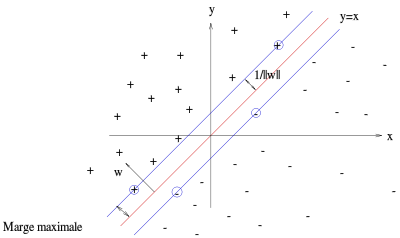

SVM model training (we use the implementation from the sklearn library)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn import svm
# Question 1: Uncomment and complete the following lines
#clf = svm.SVC(????)
#clf.fit(????)

Predictions on the test set

In [ ]:
# Question 2: Uncomment and complete the following line
#resu = clf.predict(????)

Evaluation of the model

In [ ]:
# Question 3: compute the good detection rate
# ????